In [15]:
filename = "hmma238_tp_gueladioniasse.ipynb"
filename

'hmma238_tp_gueladioniasse.ipynb'

In [16]:
taille_str=len(filename)
taille_str

31

In [17]:
ma_graine=taille_str%6
ma_graine

1

In [156]:
#from utils.py import calcul_nb_voisins(Z)

def calcul_nb_voisins(Z):

    """

    la fonction calcul_nb_voisins reçoit en entrée une liste de liste

       et renvoie le nombre de voisin(s) de chaque cellule en appliquant les règles du jeu. 

    """

    forme = len(Z), len(Z[0])
    N = [[0, ] * (forme[0]) for i in range(forme[1])]
    for x in range(1, forme[0] - 1):
        for y in range(1, forme[1] - 1):
            N[x][y] = Z[x-1][y-1]+Z[x][y-1]+Z[x+1][y-1] \
                + Z[x-1][y] + 0 +Z[x+1][y] \
                + Z[x-1][y+1]+Z[x][y+1]+Z[x+1][y+1]
        return N

Z=[[0,0,0,0,0,0],
[0,0,0,1,0,0],
[0,1,0,1,0,0],
[0,0,1,1,0,0],
[0,0,0,0,0,0],
[0,0,0,0,0,0]]

calcul_nb_voisins(Z)

[[0, 0, 0, 0, 0, 0],
 [0, 1, 3, 1, 2, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0]]

La sortie obtenue indique pour chaque cellule morte ou vivante  son nombre de voisins. Par exemple, sur la matrice Z de 


In [185]:

def iteration_jeu(Z): 
    
    """Entrée: une liste de listes composées de 1 ou de 0
       
       Sortie: une itération du jeu"""
    
    forme = len(Z), len(Z[0]) 
    N = calcul_nb_voisins(Z) 
    for x in range(1, forme[0]-1): 
        for y in range(1, forme[1]-1): 
            if Z[x][y] == 1 and (N[x][y] < 2 or N[x][y] > 3): 
                Z[x][y] = 0 
            elif Z[x][y] == 0 and N[x][y] == 3: 
                Z[x][y] = 1 
    return Z

In [202]:
##5


Z=[[0,0,0,0,0,0],
[0,0,0,1,0,0],
[0,1,0,1,0,0],
[0,0,1,1,0,0],
[0,0,0,0,0,0],
[0,0,0,0,0,0]]


def show(Z1):
    
    
    
    plt.figure(figsize=(10, 5))
    # On doit préalablement transformer nos listes en array pour pouvoir les traiter sous matplotlib
    Z1 = np.array(Z)  

    for i in range (1, 11):
        plt.subplot(2, 5, i ) # Les itérations seront représentées sur 2 lignes et 5 colonnes
        plt.imshow(Z1) # On affiche Z
        plt.title ('Etape ' + str(i-1)) # titre de chaque image
        Z1 = iteration_jeu(Z1) # M prend les valeurs de l'itération suivante du jeu
    
    
    

    
    



<IPython.core.display.Javascript object>


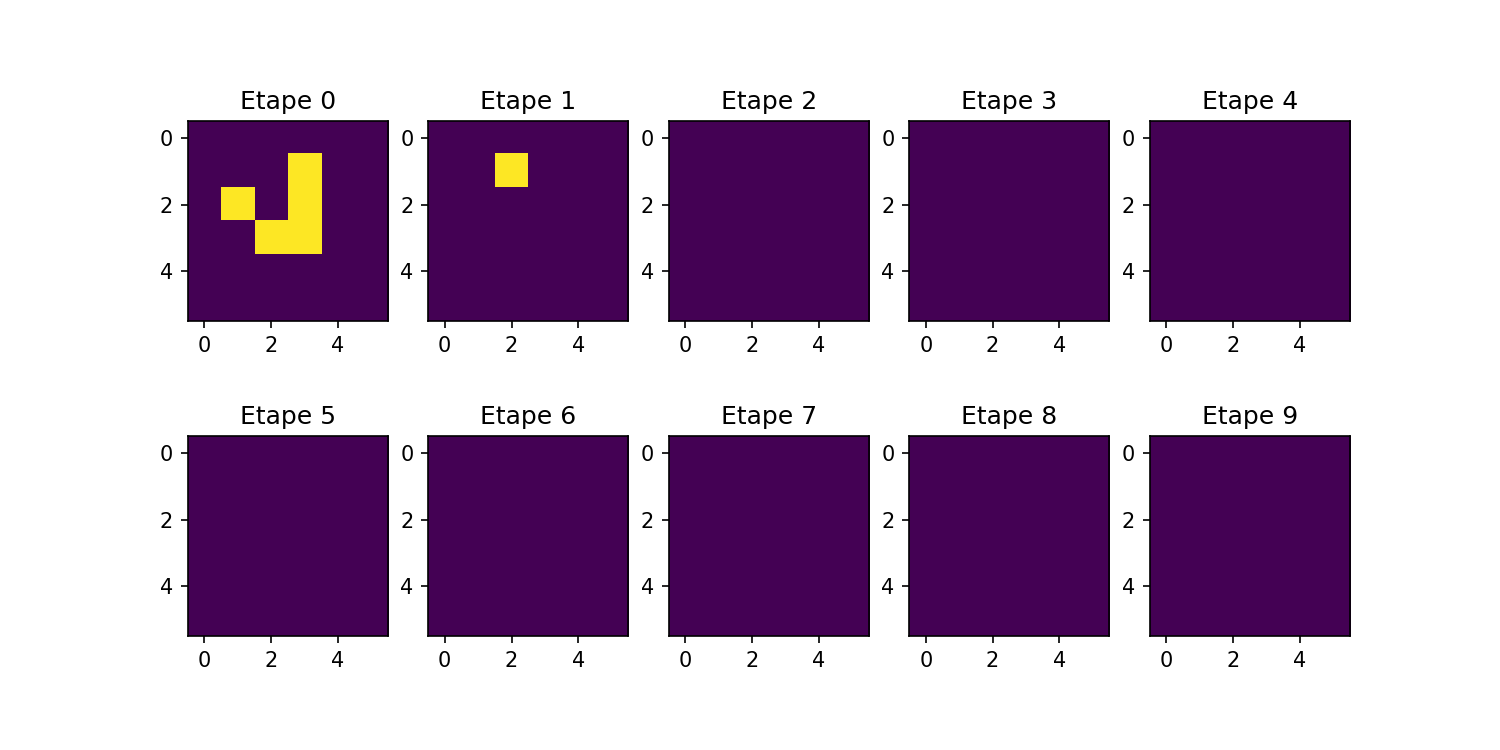

In [203]:
show(Z)

6)
Entre l'itération 0 et 4, on constate que les cellules vivantes se déplacent progressivement du milieu de la grille vers le côté en bas à droite de celle-ci. Après l'étape 7 il n'y a plus d'évolution de la grille puisqu'en effet chacune des cellules vivantes est dans des conditions adéquates pour rester vivante: les 4 cellules restantes ont chacune 3 voisins. Dans cette situation, les autres cellules qui, elles, sont mortes ont au plus 2 voisins ce qui n'est pas suffisant pour vivre.



In [143]:
# 7
import numpy as np

vect = np.array([0,1,0,0,1,1])
nb_vect = np.zeros(vect.shape) #création dun vecteur nul de taille égale à la taille de vect 
nb_vect[1:-1] += (vect[:-2] + vect[2:])

# vect[:2] represente le vecteur selectinnant tous les élèments de vect sauf les deux premiers
# vect[:-2] represente le vecteur séléctionnant  tous les élèments de vect sauf les deux derniers
# à part pour les premiers et derniers élèment du vecteur vect
# on somme sur chaque coordonnée la précédente et la suivante

nb_vect

array([0., 0., 1., 1., 1., 0.])

In [160]:
#8)

def calcul_nb_voisins_np(Z):
    
    """Calcul du nombre de voisins dans une grille grâce au slicing
    
    Entrée: Une matrice carrée composée de 1 et de 0
       
    Sortie: Le nombre de voisins de chaque cellule sauf pour le bord
    
    """
    
    Z = np.array(Z)
    nb_voisins_np = np.zeros(Z.shape) # matrice de la même dimension que Z remplie de zéros
    # chaque cellule est au plus entourée de 8 cellules
    #il nous faut sommer chacune de ces 8 cellules:
    nb_voisins_np[1:-1, 1:-1] = Z[1:-1, :-2] + \
    Z[:-2, :-2] + Z[:-2, 2:] + Z[2:, 2:] + Z[2:, :-2] + \
    Z[1:-1, 2:] + Z[:-2, 1:-1] + Z[2:, 1:-1]
    return(nb_voisins_np)

In [161]:
Z=[[0,0,0,0,0,0],
[0,0,0,1,0,0],
[0,1,0,1,0,0],
[0,0,1,1,0,0],
[0,0,0,0,0,0],
[0,0,0,0,0,0]]
calcul_nb_voisins_np(Z)

array([[0., 0., 0., 0., 0., 0.],
       [0., 1., 3., 1., 2., 0.],
       [0., 1., 5., 3., 3., 0.],
       [0., 2., 3., 2., 2., 0.],
       [0., 1., 2., 2., 1., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [179]:
# question 9
import numpy as np
from utils.py import def iteration_jeu_np(Z)
def iteration_jeu_np(Z): 
   
    
    forme = len(Z), len(Z[0]) 
    Z = np.array(Z) # On travaille cette fois avec des array
    N = calcul_nb_voisins_np(Z) # On utilise cette fois calcul_nb_voisins_np
    for x in range(1, forme[0]-1): 
        for y in range(1, forme[1]-1): 
            if Z[x][y] == 1 and (N[x][y] < 2 or N[x][y] > 3): 
                Z[x][y] = 0 
            elif Z[x][y] == 0 and N[x][y] == 3: 
                Z[x][y] = 1 
    return Z


In [182]:
iteration_jeu_np(Z) ==iteration_jeu(Z)


array([[ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True, False, False,  True],
       [ True,  True, False, False,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True]])

In [11]:
#question 11#création matrice Z_hudge
Z_huge = np.zeros((100, 100)) #creation
Z_np = np.array(
[[0, 0, 0, 0, 0, 0],
[0, 0, 0, 1, 0, 0],
[0, 1, 0, 1, 0, 0],
[0, 0, 1, 1, 0, 0],
[0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0]])

Z_huge[10:16, 10:16] = Z_np
Z_huge


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [12]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

def mon_animation(Z_in, nb_iter):
    
    fig = plt.imshow(Z_in)
    plt.show()
    plt.title("Animation du jeu")
    

    def animate(nb_iters):
        fig.set_data(jeu_np(np.array(Z_in), nb_iters))
        return fig
    gif = animation.FuncAnimation(plt.figure(), animate, frames=nb_iter)
    return(gif)


<IPython.core.display.Javascript object>


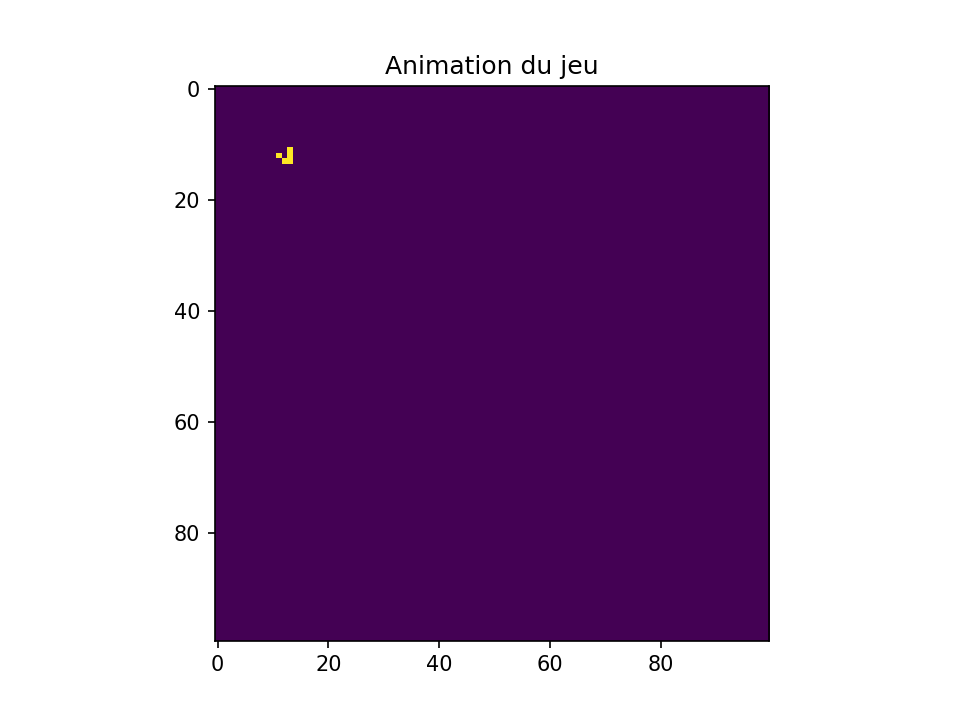

<IPython.core.display.Javascript object>


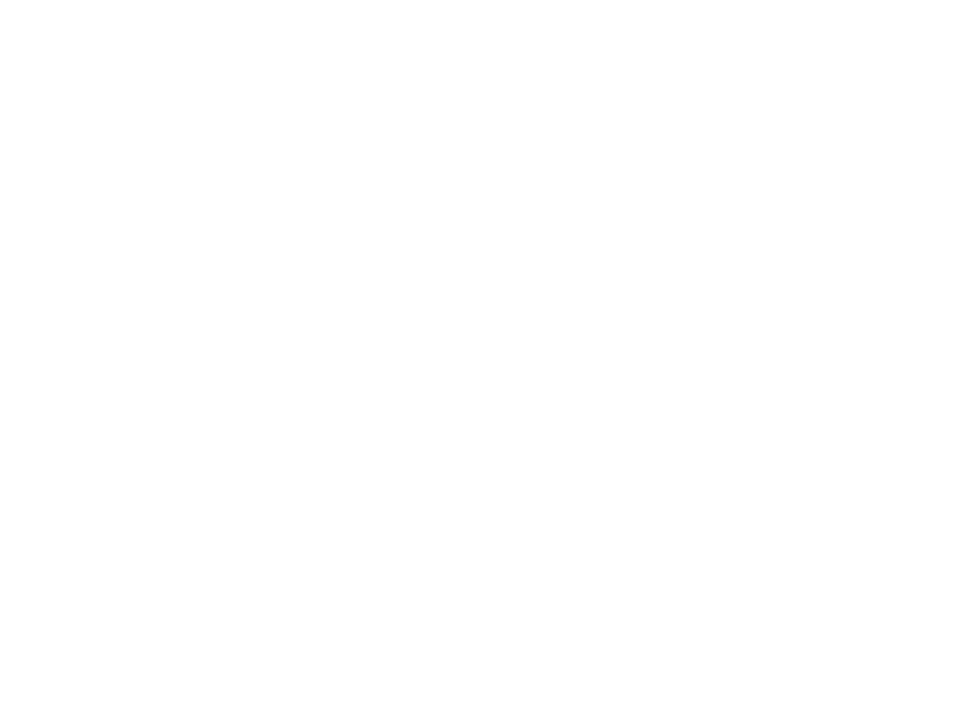

In [13]:
%matplotlib notebook
mon_animation(Z_huge, 50)

<IPython.core.display.Javascript object>


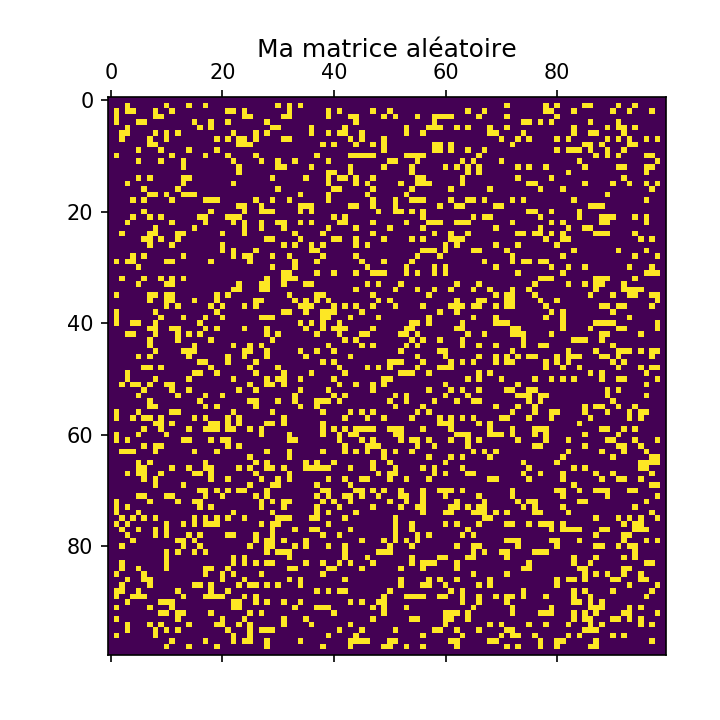

Text(0.5, 1.05, 'Ma matrice aléatoire')

In [19]:
## 12) Matrice aléatoire 100x100 remplie de 1 et de 0 
# dont la proportion de 1 est en espérance égale à (1 + ma_graine) * 10 / 100
# question 12


M = np.zeros((100, 100))
prop_active = (1 + ma_graine) * 10 / 100
M[1:-1, 1:-1] = np.random.binomial(n=1, p=prop_active, size=98*98).reshape(98, 98)
plt.matshow(M)
plt.title('Ma matrice aléatoire')

<IPython.core.display.Javascript object>


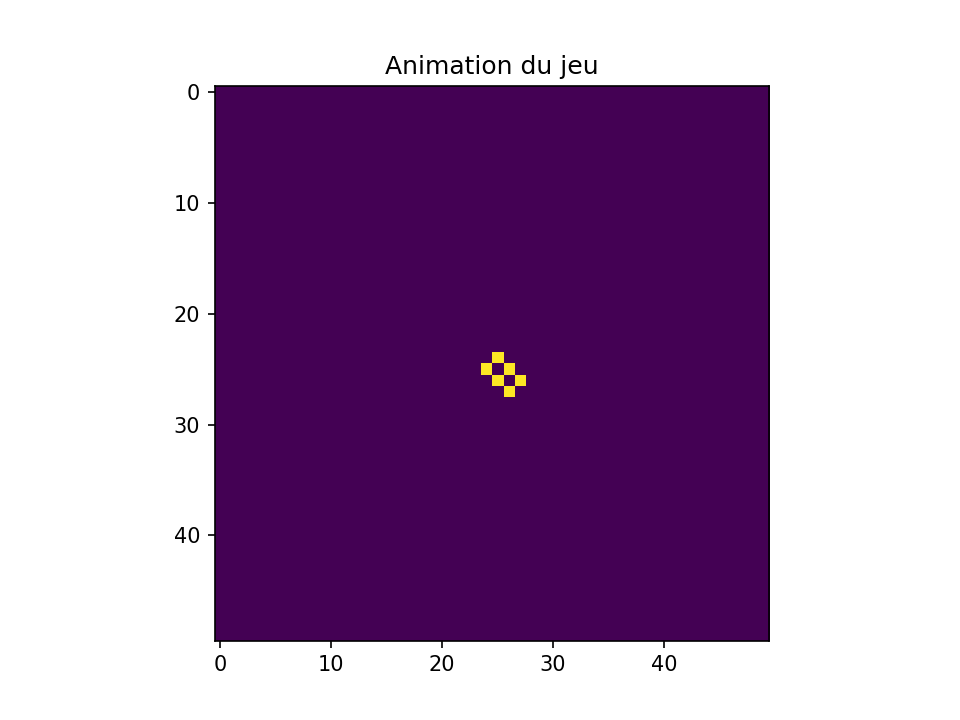

<IPython.core.display.Javascript object>


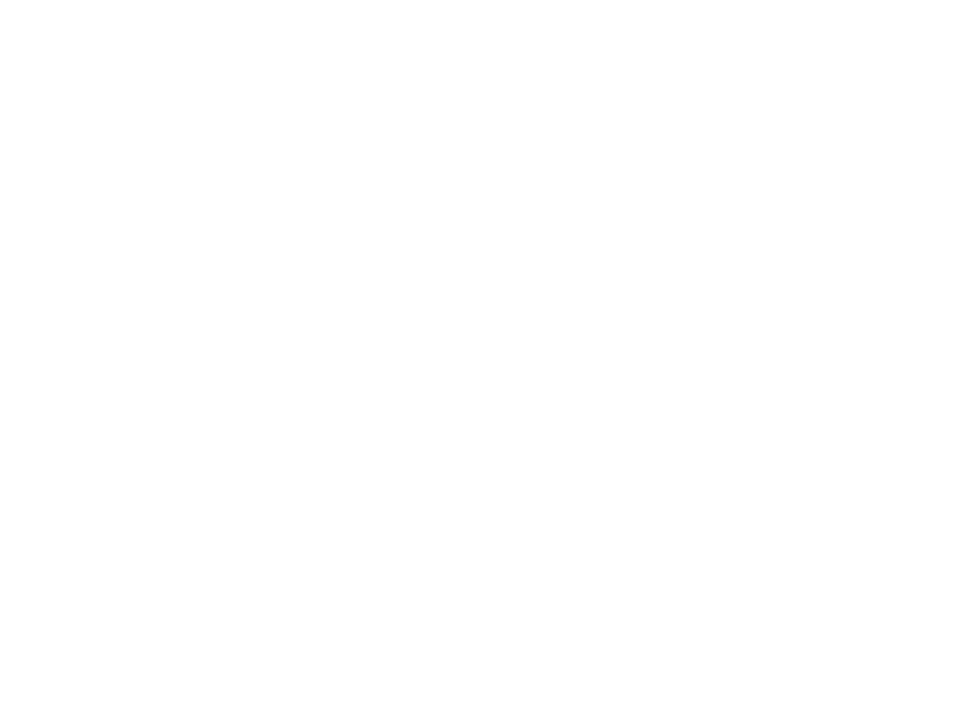

In [31]:
%matplotlib notebook
mon_animation(M, 50)


<IPython.core.display.Javascript object>


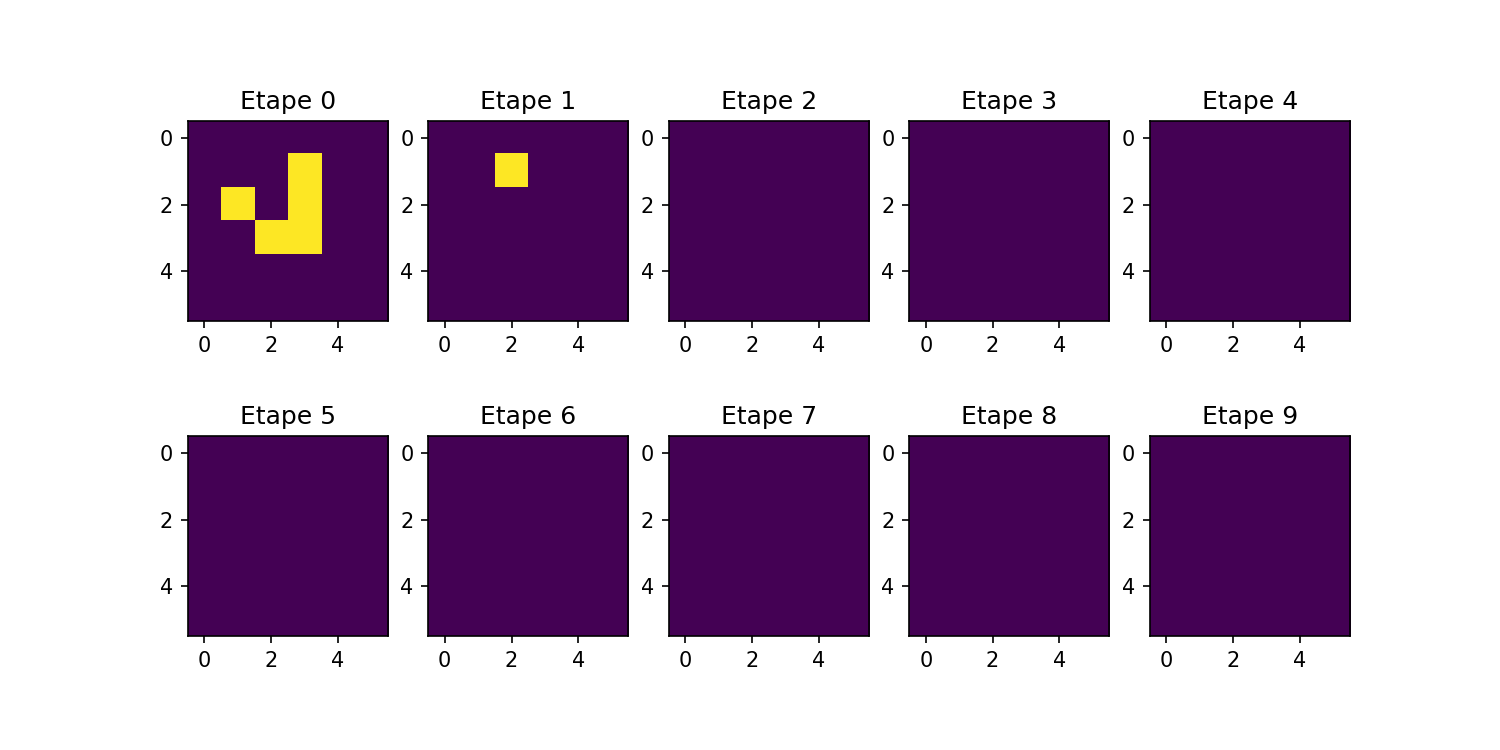

<IPython.core.display.Javascript object>


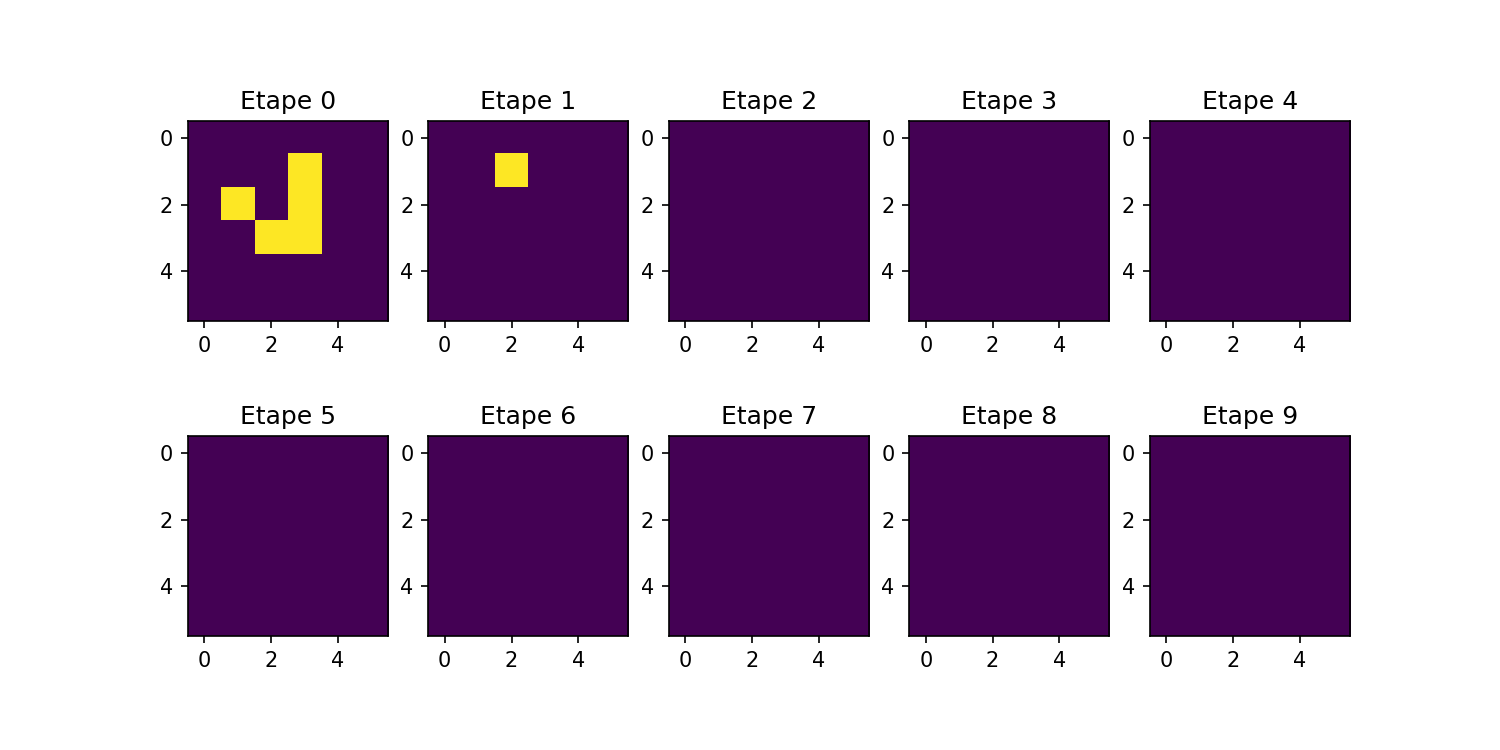

<IPython.core.display.Javascript object>


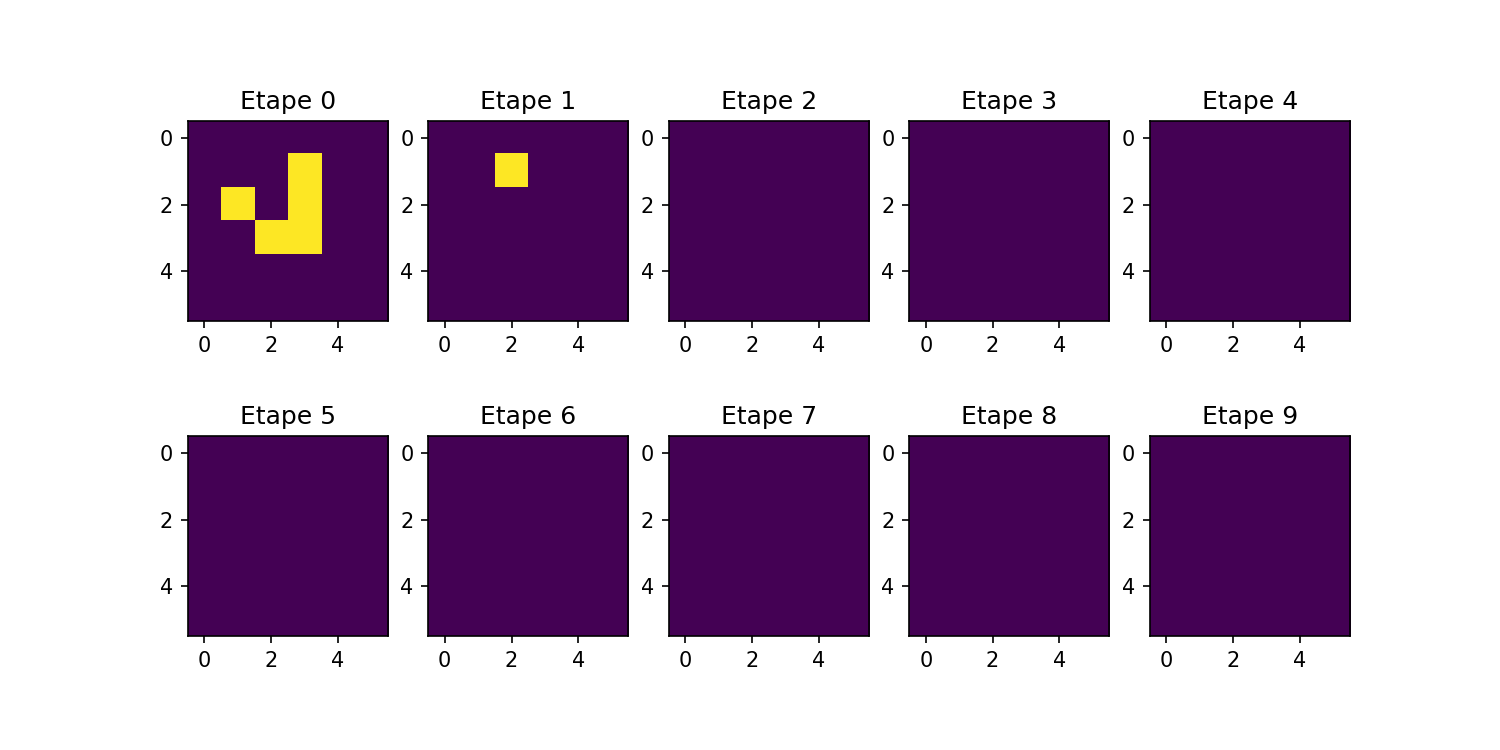

In [209]:
## Dans cette question on va choisir trois jeux 
#LOISIR
#Mailles
#Point
import matplotlib.pylab as plt
import numpy as np
from matplotlib import animation
import matplotlib.animation as animatio

#from matplotlib import animation
#import matplotlib.animation as animation

L = np.zeros((50, 50))
L[24, 25] = L[24, 26] = L[25, 24] = \
L[25, 27] = L[26, 25] = L[26, 26] = 1

M = np.zeros((50, 50)) # tube
M[24, 25] = M[25, 24] = M[25, 26] = \
M[26, 25] = M[26, 27] = M[27, 26] = 1

P = np.zeros((50, 50)) # navire
P[24, 24] = P[24, 25] = P[25,24] = \
P[25, 26] = P[26, 25] = P[26, 26] = 1

show(L)
show(M)
show(L)